<a href="https://colab.research.google.com/github/canerskrc/Machine_Learning_Application/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hem sınıflandırma hem de tahmin için kullanılan bir algoritmadır.

Veri noktalarını sınıflar arasındaki bir boşluk veya karakteristik sınır ile ayırmaya çalışır.

SVM iki sınıf arasındaki karar sınırını belirleyen ve bu sınırların iki tarafındaki en yakın eğitim örneklerini ( verilerini) destek vektörü olarak adlandıran bir sınıflandırma algoritmasıdır.

SVM doğrusal ve doğrusal olmayan (çekirdek veya kernel denilen metodu) veri seti sınıflandırmasını gerçekleştirir.

Yüksek boyutlu verisetlerinde çok verimli çalışır.



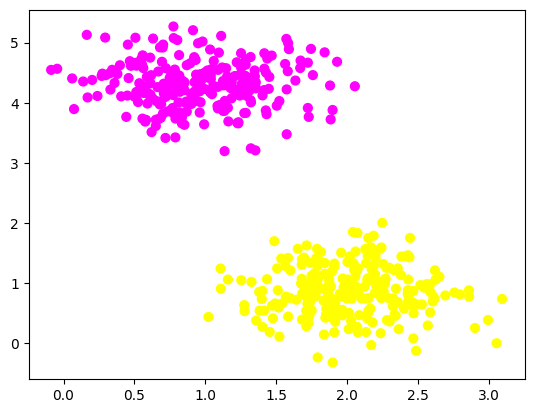

In [ ]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap='spring')
plt.show()

SVM Nasıl Çalışır ?

1- Örnekleri ( verileri ) vektör olarak ele alır.

2- Sınıflandırma için bir hiperdüzlem ve karar sınırı bulur.

3- Optimizasyon

4- Destek Vektörleri belirler.

5- Karar sınırını çizer.

In [ ]:
import pandas as pd

data = {
    "text":["Bu film harikaydı, kesinlikle tavsiye ederim.",
            "Beklentilerimi karşılamadı, hayal kırıklığına uğradım.",
            "Çok sıkıcıydı, zaman kaybı.",
            "Muhteşem bir deneyimdi, çok keyif aldım.",
            "Oyuncuların performansı çok kötüydü, hiç inandırıcı değil.",
            "Harika bir film, muhteşem bir atmosferdi.",
            "Berbattı, paramı geri istiyorum.",
            "Film çok kötüydü, oyuncuları sevmedim."],
    "label":["pozitif","negatif","negatif","pozitif","negatif","pozitif","negatif","negatif"]
}

df = pd.DataFrame(data)
df.to_csv("duygu_analizi.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("duygu_analizi.csv")


In [ ]:
X = data["text"]
y = data["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TF- IDF ( Term Frequence - Inverse Document Frequence )

Bir belgede geçen önemli bir kelimenin istatistiksel olarak vektörleştirilmesini sağlyan yöntemdir.

TF = Kelimenin sıklığı

IDF = Bir kelimenin nadirlik derecesi.



In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features= 1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
clf = SVC(kernel="linear")
clf.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test_tfidf)# vektöre dönüştürülmüş Test verileri üzerinde tahmin yap

In [ ]:
dogruluk = accuracy_score(y_test, y_pred)
print("Doğruluk:", dogruluk)

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrisi:")
print(confusion_matrix(y_test, y_pred))



Doğruluk: 1.0

Sınıflandırma Raporu:
              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00         1
     pozitif       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrisi:
[[1 0]
 [0 1]]


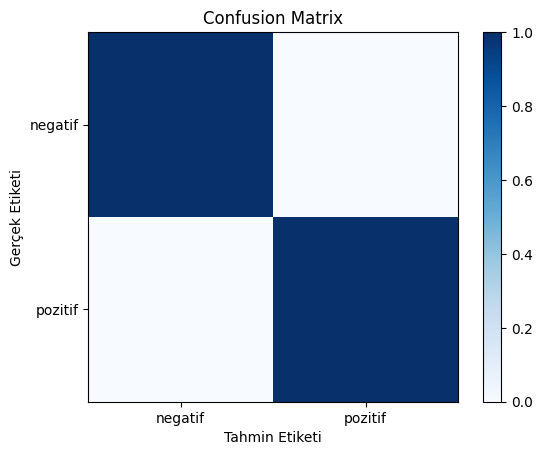

In [ ]:
conf_mat= confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1],["negatif","pozitif"])
plt.yticks([0,1],["negatif","pozitif"])
plt.xlabel("Tahmin Etiketi")
plt.ylabel("Gerçek Etiketi")
plt.show()

Kernel Türleri =

Linear = Doğrusal . En temel SVM türüdür. Veriseti dorğusal olarak ayrılır.

Polinominal = Veri setindeki doğrusal olmayan ilişkileri ayırır.

RBF (Radial Bases Function ) =Karmaşık ve linear olmayan verileri ayrırıken kullanılır. Gamma parametresi hesaplanarak verileri ayrılır.

Sigmoid = Veri setiniz doğrusal olarak ayrılamıyorsa bu durumlarda kullanılır. gamma, coef0 parametreleri hesaplanarak işlem yapılır.